##### $\hspace{15pt}$ **Filename: csvVsParquetFiles.ipynb**
##### $\hspace{1.5pt}$ **Date Created: July 10, 2024**
##### **Date Modified: July 12, 2024**
##### $\rule{10in}{1pt}$
##### **Compare the file sizes and read times of csv and parquet files that store randomly-generated dataframes.**

##### **Before running this notebook in Colab, either change the path to the folder where the csv and parquet files will be saved, or create the subfolder `/Colab Notebooks/017_csvVsParquetFiles` in your Google drive.**

##### $\rule{10in}{1pt}$

##### Load modules and packages.

In [1]:
from google.colab import drive
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import time

##### Mount Google Drive to Colab.

In [2]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


##### Set the path to save the files generated by this notebook.

In [3]:
path = "gdrive/MyDrive/Colab Notebooks/017_csvVsParquetFiles/"

##### Save 10 randomly-generated dataframes with 100 columns and increasing number of rows in csv and parquet files.

In [4]:
nRows = []
csvFilenames = []
csvFileSizes = []
parquetFilenames = []
parquetFileSizes = []
np.random.seed(1)

for i in range(1, 11):

    nRows.append(5000*i)
    df = pd.DataFrame(np.random.rand(5000*i, 100), columns = ["x" + str(j) for j in range(100)])

    if i < 10:

       csvFilename = "testData0" + str(i) + ".csv"
       parquetFilename = "testData0" + str(i) + ".parquet"

    else:

       csvFilename = "testData10.csv"
       parquetFilename = "testData10.parquet"

    csvFilenames.append(csvFilename)
    df.to_csv(path + csvFilename)
    csvFileSize = math.ceil(os.path.getsize(path + csvFilename)/(1024*1024))
    csvFileSizes.append(csvFileSize)

    parquetFilenames.append(parquetFilename)
    df.to_parquet(path + parquetFilename)
    parquetFileSize = math.ceil(os.path.getsize(path + parquetFilename)/(1024*1024))
    parquetFileSizes.append(parquetFileSize)

##### Plot the sizes of the csv and parquet files against the number of rows of the dataframes.

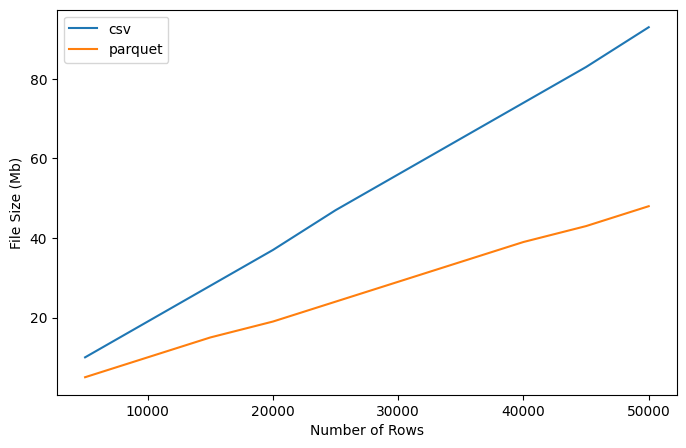

In [5]:
plt.rcParams["figure.figsize"] = [8, 5]
plt.plot(nRows, csvFileSizes)
plt.plot(nRows, parquetFileSizes)
plt.xlabel("Number of Rows")
plt.ylabel("File Size (Mb)")
plt.legend(["csv", "parquet"], loc ="upper left")
plt.show()

##### Record the times it takes to read each of the 10 csv files and 10 parquet files.

In [6]:
readCsvTimeDelta = []
readParquetTimeDelta = []

for i in range(1, 11):

    if i < 10:

       csvFilename = "testData0" + str(i) + ".csv"
       parquetFilename = "testData0" + str(i) + ".parquet"

    else:

       csvFilename = "testData10.csv"
       parquetFilename = "testData10.parquet"

    t1 = time.time()
    df1 = pd.read_csv(path + csvFilename)
    t2 = time.time()
    readCsvTimeDelta.append(t2 - t1)

    t1 = time.time()
    df2 = pd.read_parquet(path + parquetFilename)
    t2 = time.time()
    readParquetTimeDelta.append(t2 - t1)

##### Plot the times it takes to read  the csv and parquet files against the number of rows of the dataframes.

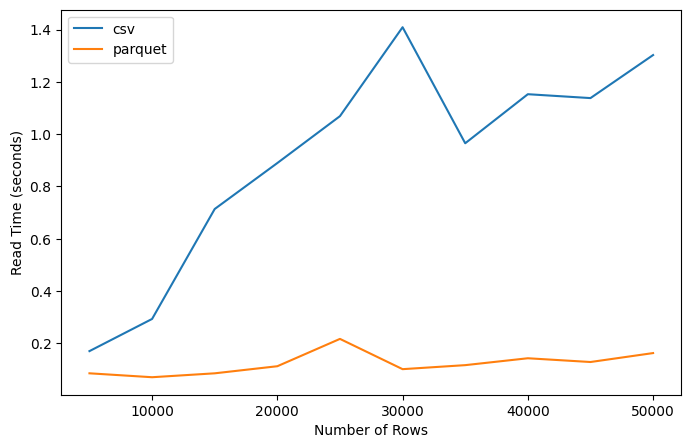

In [7]:
plt.plot(nRows, readCsvTimeDelta)
plt.plot(nRows, readParquetTimeDelta)
plt.xlabel("Number of Rows")
plt.ylabel("Read Time (seconds)")
plt.legend(["csv", "parquet"], loc ="upper left")
plt.show()